2023-11-25 22:04:30.723187: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 22:04:30.771119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 22:04:31.042267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 22:04:31.044515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 22:04:32.226274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.12.0
(60000, 28, 28)
Number of output classes is: 10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2203 - accuracy: 0.9322 - val_loss: 0.1421 - v

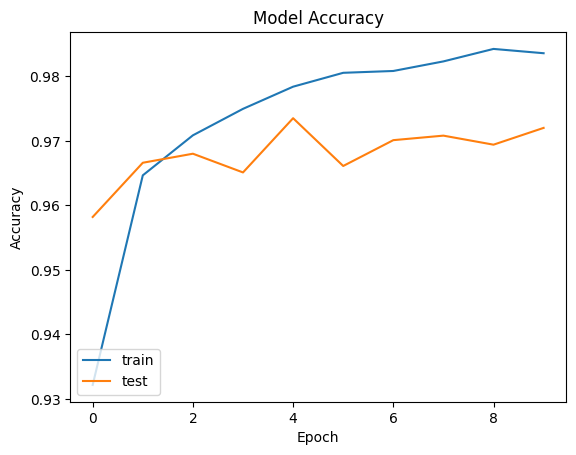

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import time

# Load MNIST data
mnist_data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist_data.load_data()

# Normalize the images
training_images, test_images = training_images / 255.0, test_images / 255.0

print(training_images.shape)

# Output classes for MNIST is 10 (digits 0-9)
output_classes = 10
print("Number of output classes is:", output_classes)

# Define the FCNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(200, activation='relu'),
    Dense(50, activation='relu'),
    Dense(output_classes, activation='softmax')
])

# Model summary
print(model.summary())

# Use Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback for early stopping
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

callback = accuracy99Callback()

# Start timing
start_time = time.time()

# Train the model
model_history = model.fit(training_images, training_labels, 
                          epochs=10, 
                          batch_size=128, 
                          validation_data=(test_images, test_labels), 
                          verbose=1,
                          callbacks=[callback])

# End timing
end_time = time.time()
training_time = end_time - start_time


train_loss, train_accuracy = model.evaluate(training_images, training_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("\n----- Model Performance Metrics -----")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# plot model accuracy
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'], loc='lower left')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
